In [1]:
import torch
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import torch.nn as nn
import pickle
import random as rd
import torch.optim as optim
import numpy as np
import sys as s
import matplotlib.pyplot as plt
import math


#           GERANDO O BANCO DE DADOS

In [2]:
from Dataset_Generator2 import Dataset
from Linear_model import Linear

In [8]:
Dataset(10,20,50)
inp1 = pickle.load(open("inp1", "rb"))
out1 = pickle.load(open("out1", "rb"))
inp2 = pickle.load(open("inp2", "rb"))
out2 = pickle.load(open("out2", "rb"))
XC = pickle.load(open("XC", "rb"))

ValueError: expected sequence of length 1 at dim 2 (got 10)

# 
# DEFINE O MODELO
# 

In [5]:
model_1 = Linear()
for m in model_1.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()  # segundo a investigar
# ,lr=1e-4,weight_decay = 1e-5)
optimizer = torch.optim.Adam(model_1.parameters())

model_2 = Linear()
for m in model_2.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()  # segundo a investigar
# ,lr=1e-4,weight_decay = 1e-5)
optimizer = torch.optim.Adam(model_2.parameters())

# Função de treino

In [7]:
def treine(model, inp, out, epochs):
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    inp = torch.as_tensor(inp.reshape(
        1, int(n_examples*n_batch*batch_size), 1))
    out = torch.as_tensor(out.reshape(
        1, int(n_examples*n_batch*batch_size), 1))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for n_batch_idx in range(n_batch):
            I = inp[n_batch_idx]
            A = out[n_batch_idx]
            # plt.plot(I,A)
            # plt.show()
            I = I.float()
            A = A.float()
            recon = model(I)
            loss = torch.mean((recon-A)**2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # s.exit()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')


treine(model_1, inp1, out1, 500)


Epoch:1,Loss:0.6019
Epoch:2,Loss:0.6019
Epoch:3,Loss:0.6019
Epoch:4,Loss:0.6019
Epoch:5,Loss:0.6019
Epoch:6,Loss:0.6019
Epoch:7,Loss:0.6019
Epoch:8,Loss:0.6019
Epoch:9,Loss:0.6019
Epoch:10,Loss:0.6019
Epoch:11,Loss:0.6019
Epoch:12,Loss:0.6019
Epoch:13,Loss:0.6019
Epoch:14,Loss:0.6019
Epoch:15,Loss:0.6019
Epoch:16,Loss:0.6019
Epoch:17,Loss:0.6019
Epoch:18,Loss:0.6019
Epoch:19,Loss:0.6019
Epoch:20,Loss:0.6019
Epoch:21,Loss:0.6019
Epoch:22,Loss:0.6019
Epoch:23,Loss:0.6019
Epoch:24,Loss:0.6019
Epoch:25,Loss:0.6019
Epoch:26,Loss:0.6019
Epoch:27,Loss:0.6019
Epoch:28,Loss:0.6019
Epoch:29,Loss:0.6019
Epoch:30,Loss:0.6019
Epoch:31,Loss:0.6019
Epoch:32,Loss:0.6019
Epoch:33,Loss:0.6019
Epoch:34,Loss:0.6019
Epoch:35,Loss:0.6019
Epoch:36,Loss:0.6019
Epoch:37,Loss:0.6019
Epoch:38,Loss:0.6019
Epoch:39,Loss:0.6019
Epoch:40,Loss:0.6019
Epoch:41,Loss:0.6019
Epoch:42,Loss:0.6019
Epoch:43,Loss:0.6019
Epoch:44,Loss:0.6019
Epoch:45,Loss:0.6019
Epoch:46,Loss:0.6019
Epoch:47,Loss:0.6019
Epoch:48,Loss:0.6019
E

In [22]:
interval = 200
Dataset(1,1,interval)

XC = (1, 1, 1)
inp = torch.Size([1, 1, 200]) 1 conjunto(s) de 1 exemplos, cada um com 200 pontos 
out = torch.Size([1, 1, 200])


In [22]:
interval = 33
test = pickle.load(open("inp1", "rb")).reshape(1,interval,1).float()
recon = model(test).reshape(1,1,interval)

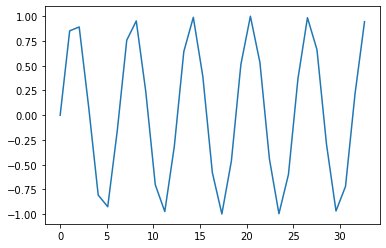

In [40]:
interval = 33
inp1 = pickle.load(open("inp1", "rb"))
out1 = pickle.load(open("out1", "rb"))
x=[]
y=[]
x = inp1.reshape(1,1,interval)
y = out1.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

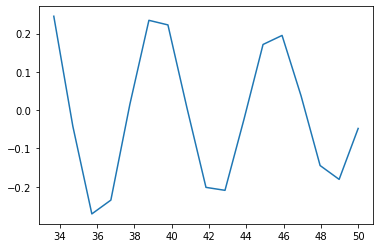

In [41]:
interval = 17
inp2 = pickle.load(open("inp2", "rb"))
out2 = pickle.load(open("out2", "rb"))
x=[]
y=[]
x = inp2.reshape(1,1,interval)
y = out2.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

ValueError: x and y must have same first dimension, but have shapes torch.Size([17]) and (33,)

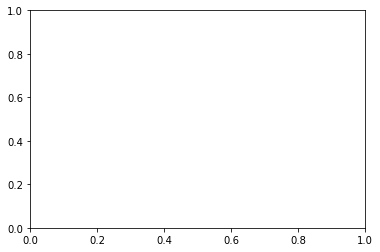

In [43]:
y = recon.detach().numpy()
x = inp2.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

ValueError: x and y must have same first dimension, but have shapes torch.Size([17]) and (33,)

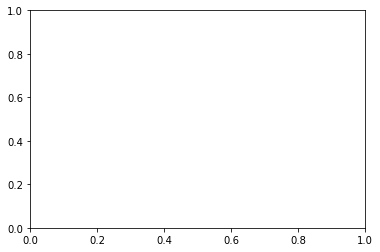

In [35]:
interval = 17
y = recon.detach().numpy()
#y = y2[::17]
x = inp2#.reshape(1,1,interval)
plt.plot(x[0][0], y[0][0])
plt.show()

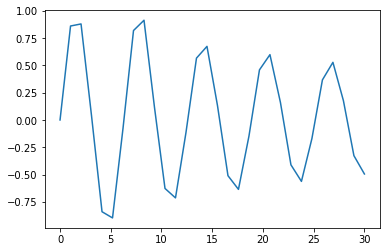

tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  0.8596,  0.8785,  0.0381, -0.8395, -0.8960, -0.0762,  0.8182,
         0.9123,  0.1142, -0.6265, -0.7129, -0.1141,  0.5658,  0.6733,  0.1325,
        -0.5097, -0.6349, -0.1476,  0.4580,  0.5977,  0.1597, -0.4104, -0.5618,
        -0.1693,  0.3666,  0.5272,  0.1765, -0.3264, -0.4940])
--------------------
tensor([ 0.0000,  1.0345,  2.0690,  3.1034,  4.1379,  5.1724,  6.2069,  7.2414,
         8.2759,  9.3103, 10.3448, 11.3793, 12.4138, 13.4483, 14.4828, 15.5172,
        16.5517, 17.5862, 18.6207, 19.6552, 20.6897, 21.7241, 22.7586, 23.7931,
        24.8276, 25.8621, 26.8966, 27.9310, 28.9655, 30.0000])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x30 and 1x300)

In [24]:
def treine(epochs):
    inp = pickle.load(open("inp", "rb"))
    out = pickle.load(open("out", "rb"))
    n_batch = np.shape(inp)[0]
    batch_size = np.shape(inp)[1]
    n_examples = np.shape(inp)[2]
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            I = inp[batch_idx]
            A = out[batch_idx]
            plt.plot(I[0],A[0])
            plt.show()
            I = I.float()
            A = A.float()
            print(A[0])
            print('-'*20)
            print(A[0])
            print('-'*20)
            for i in I:
                for j in range(len(n_examples)):
                    print(i)
                    recon, latent = model(i[j])
                    loss = torch.mean((recon-A)**2)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
        s.exit()



treine(200)
# print('end')
# -------------------------------------------------------------------------------
# --------------------- SALVANDO-------------------------------------------------
# -------------------------------------------------------------------------------
# PATH_save='Estado_Box_2_with_two_latent.pt'
##PATH_load = 'Estado_Box_2_with_two_latent.pt'
#torch.save(model.state_dict(), PATH_save)
# s.exit()
##model.load_state_dict(torch.load(PATH_load))
#torch.save(model.state_dict(), PATH_save)


# 
# GRÁFICOS
# 

In [ ]:
#inp = pickle.load(open("inp", "rb"))
#out = pickle.load(open("out", "rb"))


In [ ]:
def Latent_values_Scynet():
    for aux in range(n_batch):
        O = inp[aux].float()
        Q = question[aux].float()
        A = out[aux].float()
        j = J[aux]
        x = np.zeros(np.shape(j)[0])
        y1 = np.zeros(np.shape(j)[0])
        y2 = np.zeros(np.shape(j)[0])
        recon, latent = model(O, Q)
        for i in range(0, 499):
            x[i] = j[i]
            y1[i] = latent[i, 0]
            y2[i] = latent[i, 1]
        plt.scatter(x, y1, label='Latent Activation 1')
        plt.scatter(x, y2, label='Latent Activation 2')
        plt.xlabel('Momento angular total')
        plt.ylabel('Latent Activation')
        plt.legend()
        plt.pause(1.5)
        plt.close()

    plt.show()


Latent_values_Scynet()
# s.exit()
# -------------------------------------------------------------------------------


# An approach to predict when the prelude of mitosis occur